In [1]:
import numpy  as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse

import matplotlib.pyplot as plt
%matplotlib inline

import json
import urllib

# titanic dataset
import seaborn as sns

# 비정형 데이터 처리를 위한 라이브러리
from bs4 import BeautifulSoup
import requests
import re



print('numpy  version - ' , np.__version__)
print('pandas version - ' , pd.__version__)

numpy  version -  1.20.3
pandas version -  1.3.4


In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

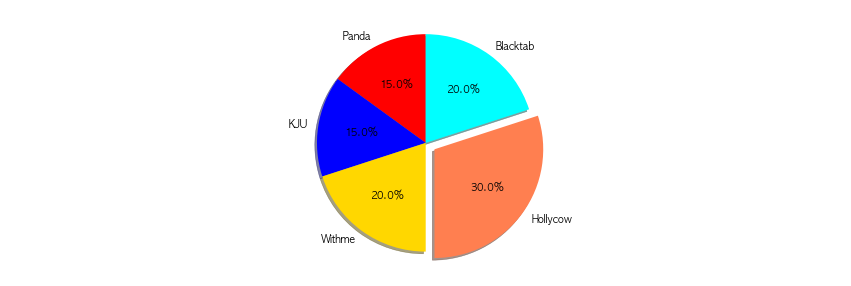

In [3]:
datas = [15, 15, 20, 30, 20]
labels = ['Panda','KJU','Withme', 'Hollycow', 'Blacktab']
colors = ['red', 'blue', 'gold', 'coral', 'cyan']

plt.figure(figsize=(15,5))
plt.style.use('ggplot')
plt.axis('equal')

explode = (0,0,0,0.1,0)

plt.pie(datas, labels = labels, colors = colors, shadow = True, autopct = '%1.1f%%',
       startangle = 90, explode = explode)



plt.show()
plt.close()


In [4]:
auto_frm = pd.read_csv('/Users/choijaewoo/visualization_data/auto-mpg.csv', header = None)

auto_frm.columns= ['mpg', 'cylinders','displacement', 'horsepower', 'weight', 'accelaration', 'model year', 'origin', 'name']

auto_frm



,mpg,cylinders,displacement,horsepower,weight,accelaration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [5]:
auto_frm['cnt'] = 1
auto_frm

,mpg,cylinders,displacement,horsepower,weight,accelaration,model year,origin,name,cnt
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,1
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,1


In [6]:
print('제조국으로 그룹을 지어서 라벨인덱스 변경 - ')
print('1-> USA , 2->KOR, 3-> EU')

# auto_frm['origin'].unique()

origin_grp = auto_frm.groupby('origin').sum()
origin_grp.index=['USA', 'KOR', 'EU']
origin_grp


제조국으로 그룹을 지어서 라벨인덱스 변경 - 
1-> USA , 2->KOR, 3-> EU


,mpg,cylinders,displacement,weight,accelaration,model year,cnt
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
KOR,1952.4,291,7640.0,169631.0,1175.1,5307,70
EU,2405.6,324,8114.0,175477.0,1277.6,6118,79


In [7]:
print('제조국으로 그룹을 지어서 라벨인덱스 변경 - ')
print('8 -> cyl8 , 4 ->cyl4, 3 -> cyl3')

cylin_grp = auto_frm.groupby('cylinders').sum()
cylin_grp.index =['cyl3','cyl4', 'cyl5','cyl6','cyl8']
cylin_grp

제조국으로 그룹을 지어서 라벨인덱스 변경 - 
8 -> cyl8 , 4 ->cyl4, 3 -> cyl3


,mpg,displacement,weight,accelaration,model year,origin,cnt
cyl3,82.2,290.0,9594.0,53.0,302,12,4
cyl4,5974.5,22398.5,470858.0,3386.7,15723,405,204
cyl5,82.1,435.0,9310.0,55.9,237,6,3
cyl6,1678.8,18324.0,268651.0,1366.1,6378,100,84
cyl8,1541.2,35536.0,423816.0,1334.4,7612,103,103


요구사항 - 
제조국별 차량 생산량을 파이차트로 한다면 - 


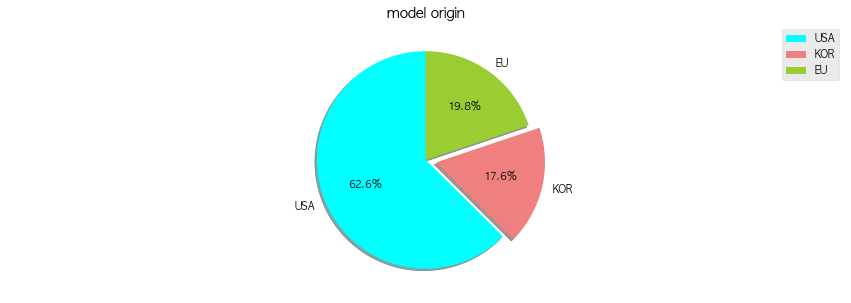

In [8]:
print('요구사항 - ')
print('제조국별 차량 생산량을 파이차트로 한다면 - ')

plt.figure(figsize=(15,5))
plt.style.use('ggplot')
plt.axis('equal')

explode = (0,0.1,0)
colors = ['cyan', 'lightcoral','yellowgreen']
plt.pie(origin_grp['cnt'],
        labels = origin_grp.index,
        colors = colors,
        shadow = True,
        autopct = '%1.1f%%',
       startangle = 90,
       explode = explode)


plt.title('model origin')
plt.legend(labels = origin_grp.index, loc = 'best')

plt.show()
plt.close()

제조국과 실린더별 파일 구현 
조건 - subplot 구현 (1,2) 



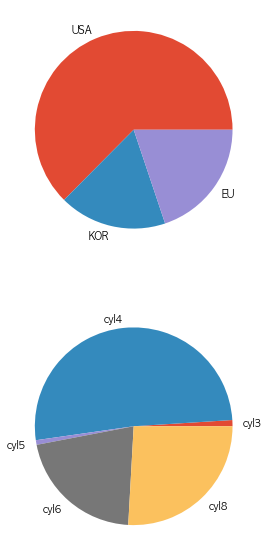

In [9]:
print('제조국과 실린더별 파일 구현 ')
print('조건 - subplot 구현 (1,2) ')
print()

datas1 = origin_grp.cnt
labels1 = origin_grp.index

datas2 = cylin_grp.cnt
labels2 = cylin_grp.index

fig = plt.figure(figsize = (20, 10))

ax01 = fig.add_subplot(2,1,1)
ax02 = fig.add_subplot(2,1,2)

ax01.pie(datas1, labels = labels1)


ax02.pie(datas2, labels = labels2)

plt.show()
plt.close()

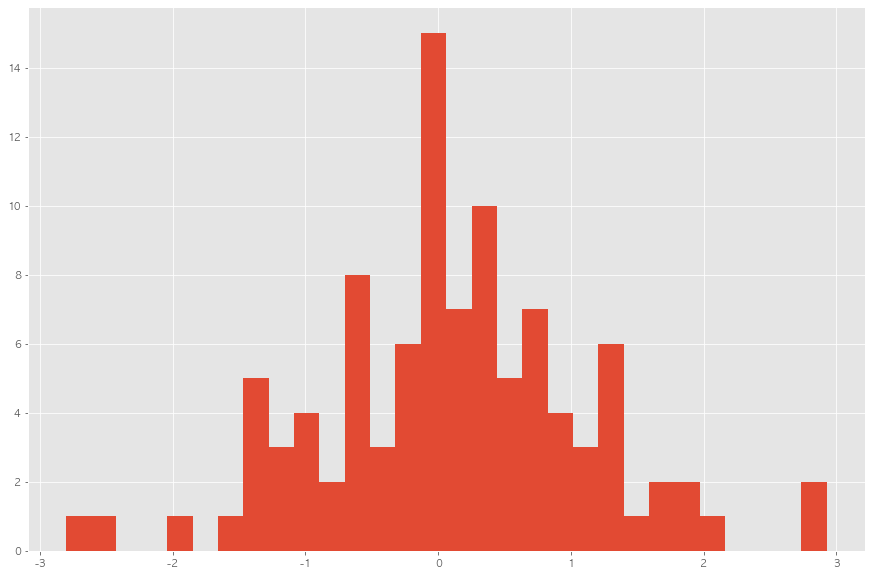

In [10]:
datas = np.random.randn(100)

plt.figure(figsize =(15,10))

plt.hist(datas, bins=30)

plt.show()
plt.close()

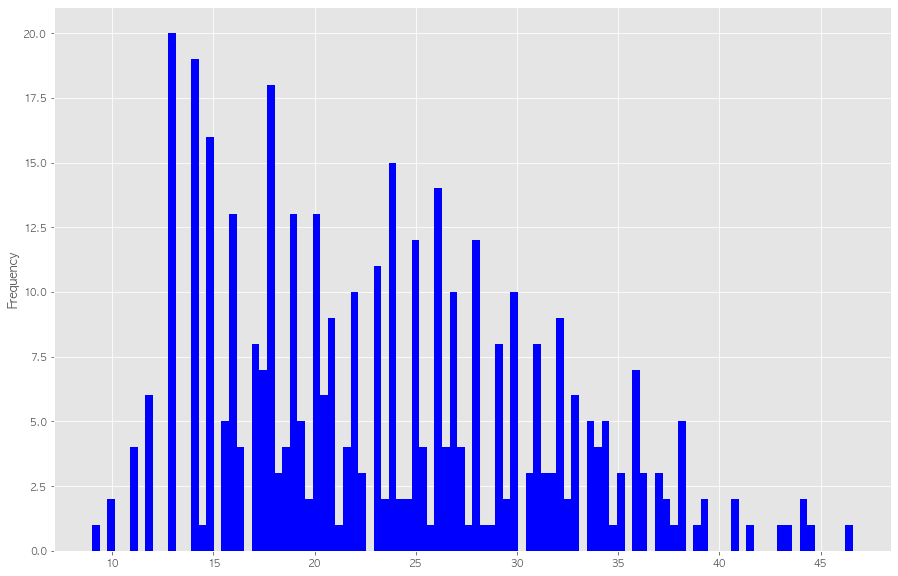

In [11]:
datas = np.random.randn(100)

plt.figure(figsize =(15,10))

# plt.hist(auto_frm['mpg'], bins=100) # 시리즈 형식으로 넣어야 한다.
auto_frm['mpg'].plot(kind = 'hist', bins = 100, color = 'blue') # 두가지 형식이 가능하다.
plt.show()
plt.close()

[-0.20827513 -0.06751958  0.0454935  -1.7463747  -1.45363293 -0.83010318
  0.45531401 -0.82533869  1.66473127  0.88912429 -0.11684535  1.65513643
 -0.9139419  -0.41422937  1.41784683  1.18741299  2.4292599  -0.97904209
  1.74837158  0.56544369  0.13155631 -1.00164418  0.41536108  1.25245309
  0.92786832 -0.03960159 -1.24543708 -1.43431275 -0.17902747  0.61352378
  0.05431628 -1.22627174  1.24981666 -0.42514286  0.89845688 -0.65054134
 -0.39228468 -1.04347289  0.06698624  0.94638638  0.71753325  0.63519397
  0.25068729  0.7530768  -1.30443842  1.07629118  0.19539274 -0.58989263
  0.78713133  1.56707029 -0.720525    0.29205533  0.84295739  2.21013364
 -0.40010836 -0.03075677  0.30439287  0.85431764 -1.09456566 -0.18815693
 -0.38090066  0.33440275  2.81438111  0.20141115 -0.46427175 -0.5135042
  0.56003136 -2.31618305  0.19386943  2.06849472  0.16939296 -1.06809311
  1.1153129  -0.8283418   0.12830688 -0.07883142  0.31577315  0.18141383
  0.47481633 -0.89326236  1.68104763  0.30362971 -1.

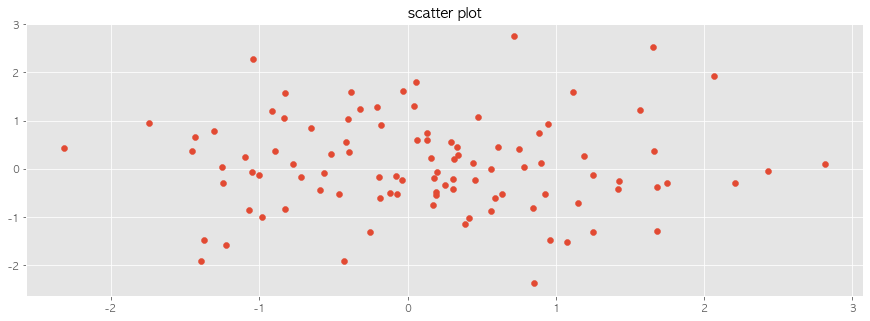

In [12]:
X = np.random.normal(0,1,100)
print(X)

Y = np.random.normal(0,1,100)
print(Y)

plt.figure(figsize= (15,5))

plt.scatter(X,Y)
plt.title('scatter plot')
plt.show()
plt.close()

In [13]:
from sklearn.datasets import load_digits

In [14]:
digits = load_digits()
print('type - ',type(digits))
print('keys - ', digits.keys)


type -  <class 'sklearn.utils.Bunch'>
keys -  <built-in method keys of Bunch object at 0x7fa3b37f6ef0>


In [15]:
img = digits.images[0]
img

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

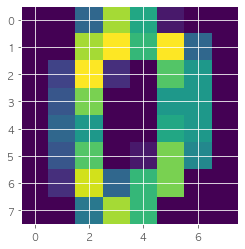

In [16]:
plt.imshow(img)

In [17]:
tmp_frm = pd.read_excel('/Users/choijaewoo/visualization_data/koweps_visualization.xlsx', header=0)
tmp_frm

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,9800,7,1,98000701,1,NaN,735.488155,0.221339,735.488155,0.221339,...,NaN,NaN,NaN,NaN,NaN,NaN,979.0,NaN,0,NaN
15418,9800,7,1,98000701,1,NaN,898.395613,0.270365,898.395613,0.270365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
15419,9800,7,1,98000701,1,NaN,2686.353997,0.808438,2676.190322,0.805379,...,NaN,NaN,NaN,NaN,NaN,NaN,868.0,NaN,0,NaN
15420,9800,7,1,98000701,1,NaN,841.651153,0.253288,841.651153,0.253288,...,NaN,NaN,NaN,NaN,NaN,NaN,518.0,NaN,0,NaN


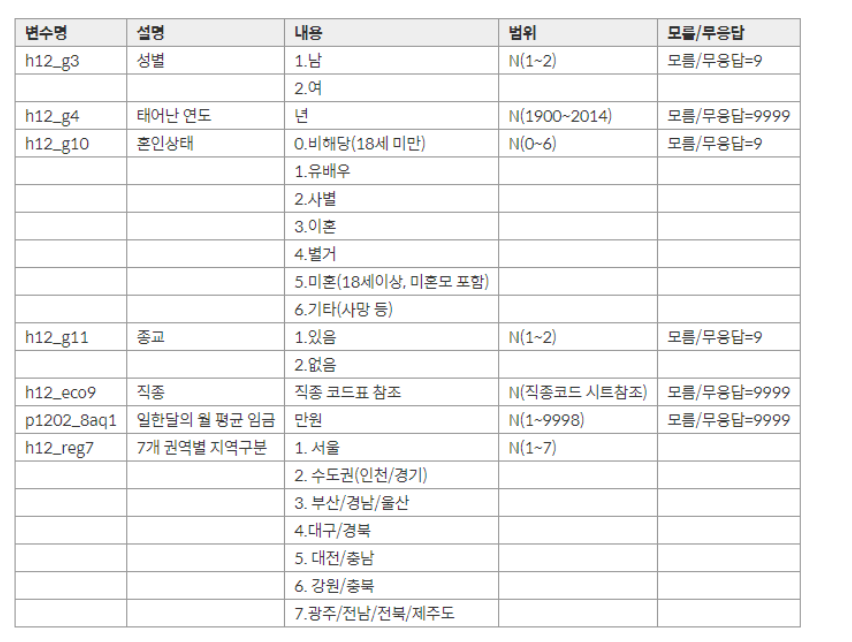

In [18]:
from IPython.display import Image
Image('/Users/choijaewoo/img/koweps_img.png', width = 700)

In [19]:
koweps = tmp_frm.copy()
koweps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Columns: 1191 entries, h12_id to h12_pers_income5
dtypes: float64(999), int64(191), object(1)
memory usage: 140.1+ MB


In [20]:
koweps_subset = koweps[['h12_g3' , 'h12_g4' , 'h12_g10' , 'h12_g11' , 'h12_eco9' , 'p1202_8aq1' , 'h12_reg7']]
koweps_subset.columns = ['성별' , '태어난 연도' , '혼인상태' , '종교' , '직종' , '일한달의 월 평균 임금' , '7개 권역별 지역구분']
koweps_subsetkoweps_subset = koweps[['h12_g3' , 'h12_g4' , 'h12_g10' , 'h12_g11' , 'h12_eco9' , 'p1202_8aq1' , 'h12_reg7']]
koweps_subset.columns = ['성별' , '태어난 연도' , '혼인상태' , '종교' , '직종' , '일한달의 월 평균 임금' , '7개 권역별 지역구분']
koweps_subset

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5
15418,2,1992,5,1,NaN,NaN,5
15419,1,1995,5,1,521.0,72.0,5
15420,2,1998,5,1,432.0,NaN,5


In [21]:
koweps_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   성별            15422 non-null  int64  
 1   태어난 연도        15422 non-null  int64  
 2   혼인상태          15422 non-null  int64  
 3   종교            15422 non-null  int64  
 4   직종            7131 non-null   float64
 5   일한달의 월 평균 임금  4507 non-null   float64
 6   7개 권역별 지역구분   15422 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 843.5 KB


In [22]:
print('조사 대상자들에 대한 성별의 분포를 막대그래프로 시각화 한다면 ')

조사 대상자들에 대한 성별의 분포를 막대그래프로 시각화 한다면 


In [23]:
koweps_subset.filter(['성별',])


,성별
0,2
1,2
2,1
3,1
4,2
...,...
15417,2
15418,2
15419,1
15420,2


In [24]:
np.where(koweps_subset.filter(['성별']) == 1, '남자','여자')

array([['여자'],
       ['여자'],
       ['남자'],
       ...,
       ['남자'],
       ['여자'],
       ['남자']], dtype='<U2')

In [25]:
koweps_subset['성별2'] = koweps_subset['성별'].apply(lambda x : 'male' if x == 1 else'female' )

In [26]:
koweps_subset.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분,성별2
0,2,1936,2,2,NaN,NaN,1,female
1,2,1945,2,2,NaN,NaN,1,female
2,1,1948,2,2,NaN,NaN,1,male
3,1,1942,3,1,762.0,108.9,1,male
4,2,1923,2,1,NaN,NaN,1,female


In [27]:
koweps_subset['성별2'].value_counts() # 분포를 할때는 values_counts가 좋다

female    8440
male      6982
Name: 성별2, dtype: int64

In [28]:
koweps_subset.pivot_table()

ValueError: No group keys passed!

In [ ]:
gender_frm = pd.DataFrame(koweps_subset['성별2'].value_counts())
gender_frm.columns = ['명']

In [ ]:
gender_frm.plot(kind='bar', rot =0 , figsize = (15,10))

for idx, value in enumerate(list(gender_frm['명']) ):
    print(idx,value)
    txt = '%d명'% value
    plt.text(idx, value, txt,
            horizontalalignment = 'center',
            verticalalignment = 'bottom',
            fontsize = 15,
            color ='blue')

plt.title('성별분포')
plt.xlabel('성별')
plt.ylabel('명')
plt.grid(True)


plt.show()
plt.close()

In [ ]:
print('성별 분포에 대한 시각화 - pie ')


plt.figure(figsize=(15,5))
plt.style.use('ggplot')
plt.axis('equal')

explode = (0,0.1)
colors = ['cyan', 'lightcoral']
plt.pie(gender_frm['명'],
        labels = gender_frm.index,
        colors = colors,
        shadow = True,
        autopct = '%1.1f%%',
       startangle = 90,
       explode = explode)


plt.title('model origin')
plt.legend(labels = origin_grp.index, loc = 'best')

plt.show()
plt.close()

<AxesSubplot:>

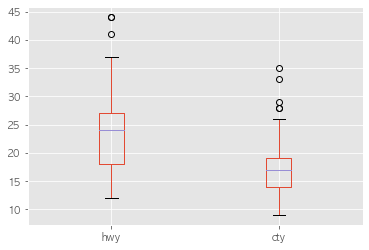

In [31]:
tmp_frm = pd.read_excel('/Users/choijaewoo/visualization_data/car_mpg.xlsx', header = 0)
tmp_frm.drop('Unnamed: 0', axis=1 , inplace = True)
tmp_frm


outlier_frm = tmp_frm.filter(['hwy','cty'])

outlier_frm.boxplot()

In [32]:
print('사분위수')

outlier_frm.quantile(q=0.75)


사분위수


hwy    27.0
cty    19.0
Name: 0.75, dtype: float64

In [33]:
print('IQR(3 - 1)')

iqr = outlier_frm.quantile(q=0.75) - outlier_frm.quantile(q=0.25)
iqr

IQR(3 - 1)


hwy    9.0
cty    5.0
dtype: float64

In [34]:
print('Q1 - 1.5 * IQR , Q3 - 1.5 * IQR') # inner fence 값을 구한다.
print('Q1 - 3 * IQR,    Q3 + 3 * IQR ') # outer fence 값을 구한다.

print()

lower = outlier_frm.quantile(q=0.25) - 1.5 * iqr
upper = outlier_frm.quantile(q=0.75) + 1.5 * iqr

lower_outlier = outlier_frm[outlier_frm > lower].min()

upper_outlier = outlier_frm[outlier_frm < upper].max()
print()
print('아래 수평선 - \n', lower_outlier)

print('위 수평선 - \n', upper_outlier)

Q1 - 1.5 * IQR , Q3 - 1.5 * IQR
Q1 - 3 * IQR,    Q3 + 3 * IQR 


아래 수평선 - 
 hwy    12
cty     9
dtype: int64
위 수평선 - 
 hwy    37.0
cty    26.0
dtype: float64


In [35]:
print('고속도로 연비의 이상치 데이터를 추출 ',upper_outlier['hwy'])
print('도시 연비의 이상치 데이터를 추출 ', upper_outlier['cty'])

고속도로 연비의 이상치 데이터를 추출  37.0
도시 연비의 이상치 데이터를 추출  26.0


In [36]:
display(tmp_frm.loc[tmp_frm['hwy'] > upper_outlier['hwy'], :] )

hwy_s = tmp_frm.loc[tmp_frm['hwy'] > upper_outlier['hwy'], ['hwy']]

display(tmp_frm.loc[tmp_frm['cty'] > upper_outlier['cty'], :] )

cty_s = tmp_frm.loc[tmp_frm['cty'] > upper_outlier['cty'], ['cty']]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
99,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [37]:
print('이상치 정제- 결측값으로 변환 후 중위수의 값으로 대체')
print()
outlier_clean_frm = tmp_frm.copy()
outlier_clean_frm

이상치 정제- 결측값으로 변환 후 중위수의 값으로 대체



,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [38]:
for idx in hwy_s.index:
    outlier_clean_frm.loc[idx,'hwy'] = np.NaN

for idx in cty_s.index:
    outlier_clean_frm.loc[idx,'cty'] = np.NaN


In [39]:
print(outlier_clean_frm['hwy'].isna().sum() )

print(outlier_clean_frm['cty'].isna().sum() )

3
5


In [40]:
print('중위수 대체')
outlier_clean_frm['hwy'].median()
outlier_clean_frm['cty'].median()



중위수 대체


16.0

이상치 처리 후 박스 플롯


<AxesSubplot:>

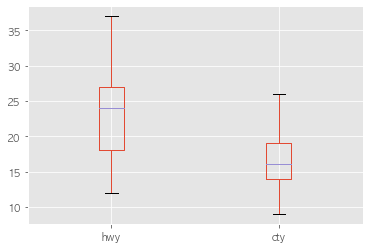

In [41]:
print('이상치 처리 후 박스 플롯')

outlier_frm = outlier_clean_frm.filter(['hwy','cty'])

outlier_frm.boxplot()

구동방식별 고속도로, 도시 연비평균을 막대그래프로 시각화 한다면? 


<AxesSubplot:xlabel='drv'>

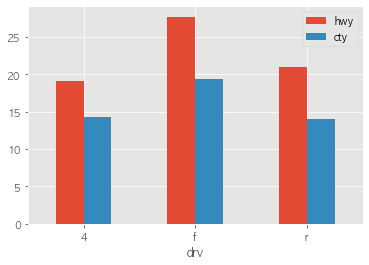

In [42]:
print('구동방식별 고속도로, 도시 연비평균을 막대그래프로 시각화 한다면? ')

outlier_clean_frm[['drv', 'hwy', 'cty']].groupby('drv').mean().plot(kind='bar', rot = 0)